# 11-7-24      : Practical 3.4.1 - Data Visualization Using Matplotlib

**J008**

**Faraz syed**

### Q1) using inbuilt titanic dataset perform EDA

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [80]:
titanic=sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [48]:
titanic.shape

(891, 15)

In [50]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

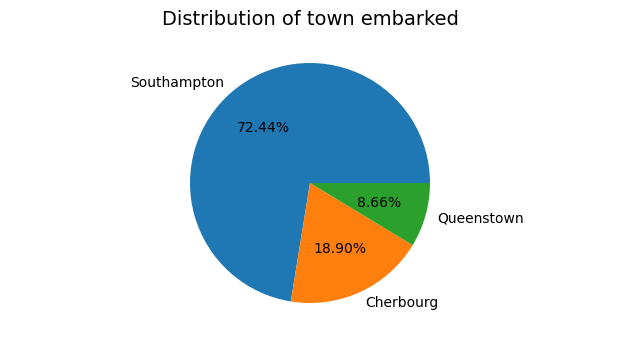

In [53]:
fig=plt.figure(figsize=(6, 3))
counts=titanic['embark_town'].value_counts()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.pie(counts,labels=counts.index,autopct='%1.2f%%')
plt.title('Distribution of town embarked',fontsize=14)
plt.show()

Pie chart shows that maximum of the passengers have embarked from Southampton. 

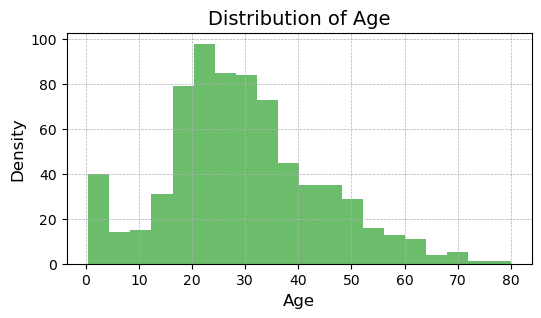

In [54]:
plt.figure(figsize=(6, 3))
plt.hist(titanic["age"], bins=20, color='#2ca02c', alpha=0.7)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Age", fontsize=14)
plt.show()

Histogram shows the range of ages. Maximum passengers were from 20-35 group.

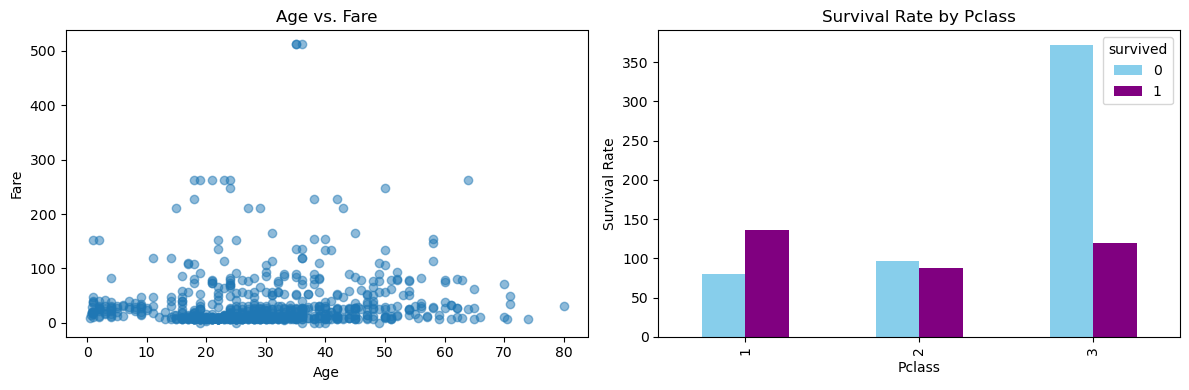

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4)) 
axes[0].scatter(titanic['age'], titanic['fare'], alpha=0.5)
axes[0].set_title('Age vs. Fare')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
survival_counts = titanic['survived'].groupby(titanic['pclass']).value_counts().unstack()
survival_counts.plot(kind='bar', color=['skyblue', 'purple'], ax=axes[1])
axes[1].set_title('Survival Rate by Pclass')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Survival Rate')
plt.tight_layout()
plt.show()

In [ ]:
Subplot above shows us the distributions of different variables. 

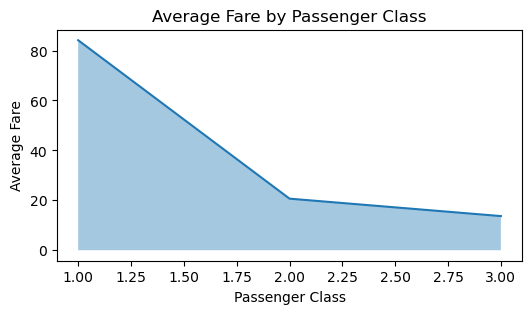

In [60]:
average_fare = titanic.groupby('pclass')['fare'].mean().reset_index()
plt.figure(figsize=(6, 3))
plt.plot(average_fare['pclass'], average_fare['fare']) 
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.title("Average Fare by Passenger Class")
plt.fill_between(average_fare['pclass'], 0, average_fare['fare'], alpha=0.4)
plt.show()

From the above plot we can observe that the fare was directly proportional to passenger class. 

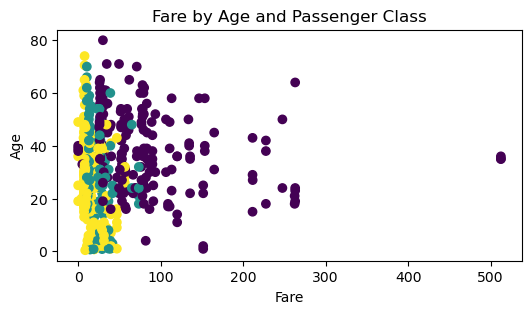

In [136]:
plt.figure(figsize=(6, 3))
plt.scatter(titanic['fare'],titanic['age'], c=titanic['pclass'])
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Fare by Age and Passenger Class")
plt.show()

From above scatter plot we can notice that the fare was higher for first class.

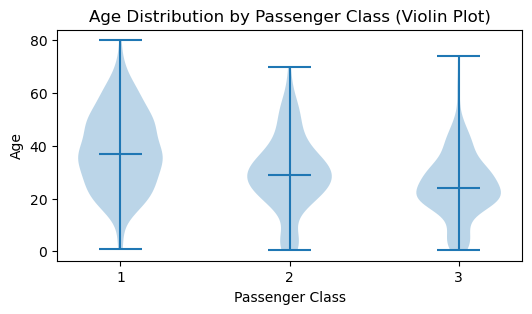

In [75]:
# Group data by 'pclass'
plt.figure(figsize=(6, 3))
data = [titanic[titanic['pclass'] == pclass]['age'].dropna() for pclass in sorted(titanic['pclass'].unique())]
plt.violinplot(data, showmeans=False, showmedians=True)
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Passenger Class (Violin Plot)")
# Adding custom x-ticks
plt.xticks([1, 2, 3], sorted(titanic['pclass'].unique()))
plt.show()

Here, we can observe that second and third class had lesser population of old. 

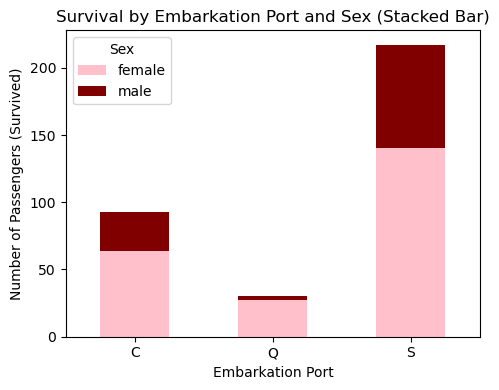

In [140]:
data_pivot = titanic.pivot_table(index='embarked', columns='sex', values='survived', aggfunc='sum')
fig, ax = plt.subplots(figsize=(5, 4))
data_pivot.plot(kind='bar', stacked=True, color=['pink', 'maroon'], ax=ax)
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers (Survived)")
plt.xticks(rotation=0)
plt.title("Survival by Embarkation Port and Sex (Stacked Bar)")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

Notice that from any embarkment town, females survived more. 

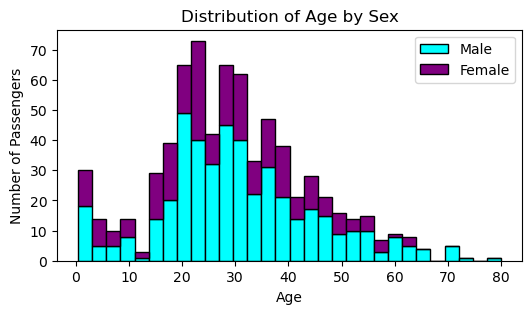

In [77]:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist([titanic[titanic['sex'] == 'male']['age'],titanic[titanic['sex'] == 'female']['age']],
        bins=30,stacked=True,color=['cyan','purple'],edgecolor='black')
ax.set_title('Distribution of Age by Sex')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')
ax.legend(['Male','Female'])
plt.show()

### Q2) 

In [99]:
iris=sns.load_dataset('iris')

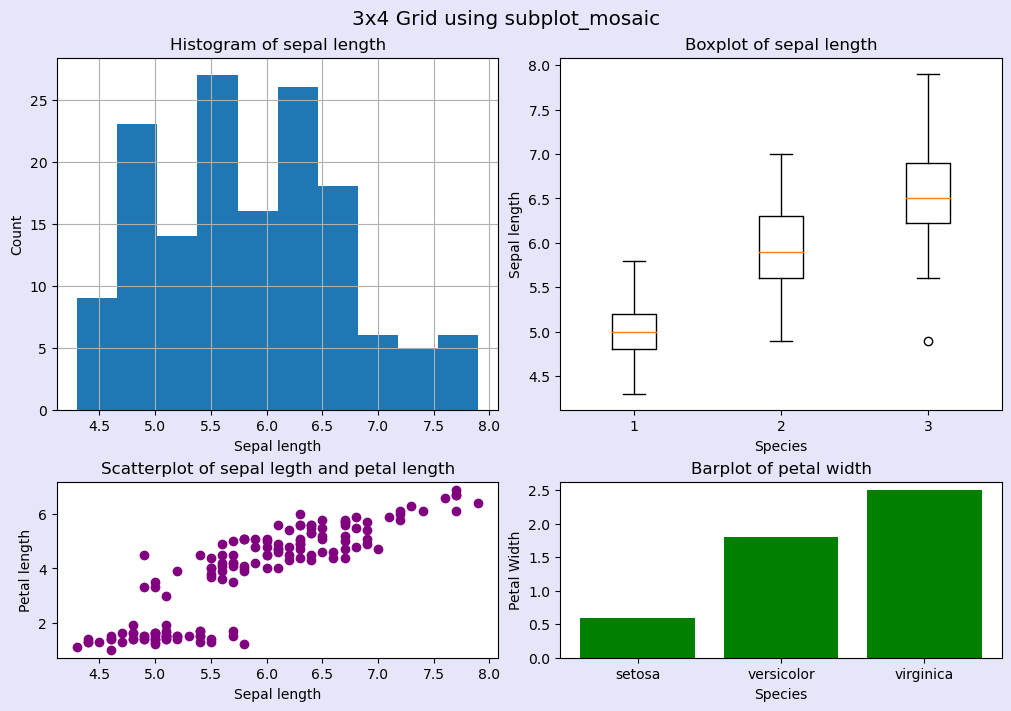

In [83]:
#using subplot_mosaic

layout=[
    ['A','A','B','B'],
    ['A','A','B','B'],
    ['C','C','D','D']
]
fig,axs = plt.subplot_mosaic(layout,figsize=(10,7),facecolor="lavender",layout="constrained")
axs['A'].hist(iris['sepal_length'])
axs['A'].grid()
axs['A'].set_xlabel('Sepal length')
axs['A'].set_ylabel('Count')
axs['A'].set_title('Histogram of sepal length')
axs['D'].bar(iris['species'],iris['petal_width'],color='green')
axs['D'].set_xlabel('Species')
axs['D'].set_ylabel('Petal Width')
axs['D'].set_title('Barplot of petal width')
axs['C'].scatter(iris['sepal_length'],iris['petal_length'],color='purple')
axs['C'].set_xlabel('Sepal length')
axs['C'].set_ylabel('Petal length')
axs['C'].set_title('Scatterplot of sepal legth and petal length')
axs['B'].boxplot([iris[iris['species'] == 'setosa']['sepal_length'],
             iris[iris['species'] == 'versicolor']['sepal_length'],
             iris[iris['species'] == 'virginica']['sepal_length']])
axs['B'].set_xlabel('Species')
axs['B'].set_ylabel('Sepal length')
axs['B'].set_title('Boxplot of sepal length')
fig.suptitle("3x4 Grid using subplot_mosaic",fontsize="x-large")
plt.show()

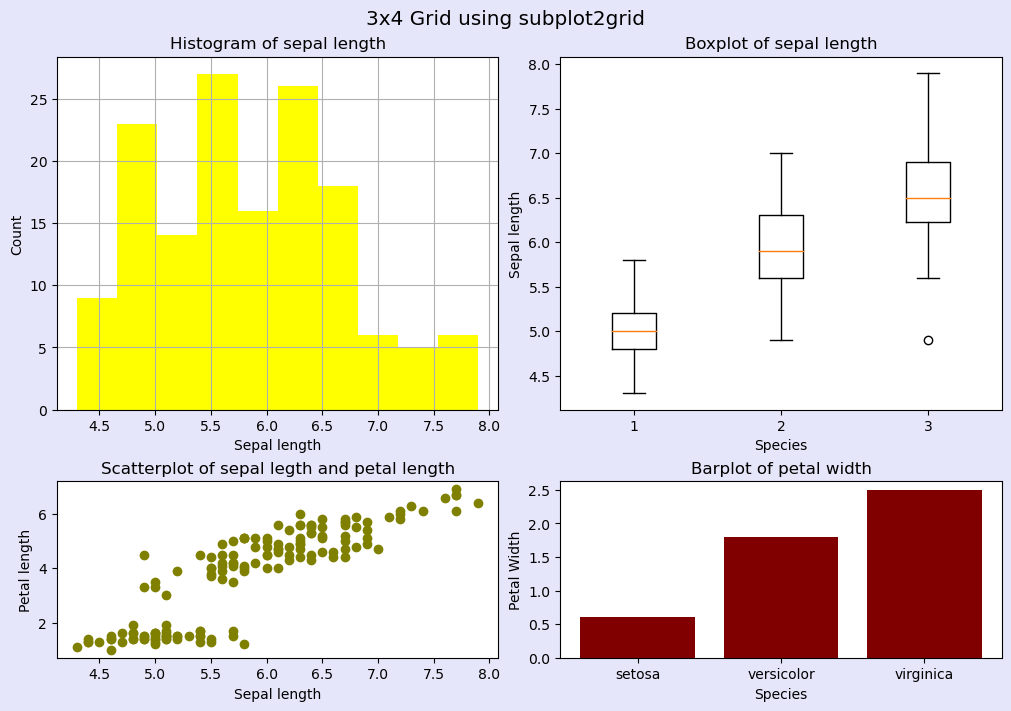

In [84]:
#using subplot2grid
fig=plt.figure(figsize=(10,7),facecolor="lavender",layout="constrained")
axs1 = plt.subplot2grid((3,4),(0,0),colspan=2,rowspan=2)
axs1.hist(iris['sepal_length'],color='yellow')
axs1.grid()
axs1.set_xlabel('Sepal length')
axs1.set_ylabel('Count')
axs1.set_title('Histogram of sepal length')
axs2=plt.subplot2grid((3,4),(0,2),colspan=2,rowspan=2)
axs2.boxplot([iris[iris['species'] == 'setosa']['sepal_length'],
             iris[iris['species'] == 'versicolor']['sepal_length'],
             iris[iris['species'] == 'virginica']['sepal_length']])
axs2.set_xlabel('Species')
axs2.set_ylabel('Sepal length')
axs2.set_title('Boxplot of sepal length')
axs3=plt.subplot2grid((3,4),(2,0),colspan=2)
axs3.scatter(iris['sepal_length'],iris['petal_length'],color='olive')
axs3.set_xlabel('Sepal length')
axs3.set_ylabel('Petal length')
axs3.set_title('Scatterplot of sepal legth and petal length')
axs4=plt.subplot2grid((3,4),(2,2),colspan=2)
axs4.bar(iris['species'],iris['petal_width'],color='maroon')
axs4.set_xlabel('Species')
axs4.set_ylabel('Petal Width')
axs4.set_title('Barplot of petal width')
fig.suptitle("3x4 Grid using subplot2grid",fontsize="x-large")
plt.show()

## Q3)

In [157]:
cars=pd.read_csv(r"C:\Users\masir\Downloads\used_cars.csv")
cars.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"


In [159]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [20]:
cars.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

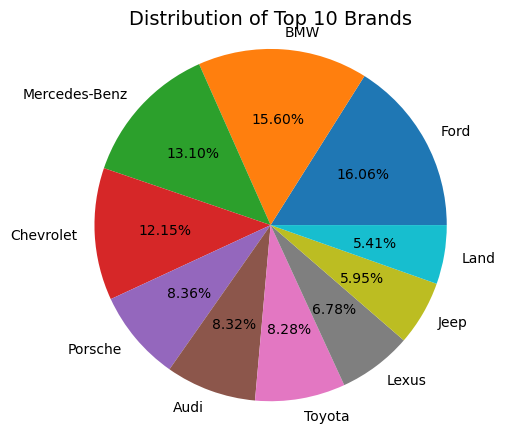

In [89]:
#a)
top_10_brands = cars['brand'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.2f%%')
ax.set_title('Distribution of Top 10 Brands', fontsize=14)
ax.axis('equal')
plt.show()

In [90]:
cars['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

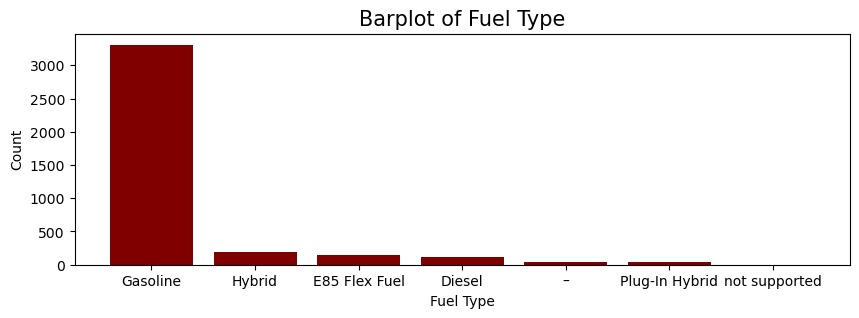

In [95]:
#b)
counts = cars['fuel_type'].value_counts()
figure = plt.figure(figsize=(10, 3))
plt.bar(counts.index, counts.values, color='maroon')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Barplot of Fuel Type',fontsize=15)
plt.show()

In [ ]:
#c) Doesn't make sense to plot as clean titles has only 'yes' values and missing entries. 

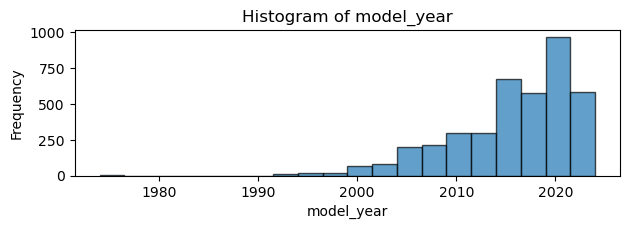

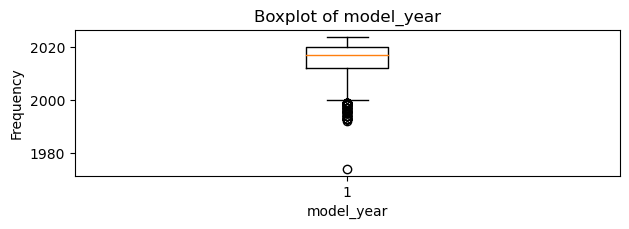

In [171]:
#d) 
df = cars
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,4))
for col in numerical_cols:
    plt.subplot(2, 2, list(numerical_cols).index(col) + 1)
    plt.hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
for col in numerical_cols:
    plt.subplot(2, 2, list(numerical_cols).index(col) + 1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

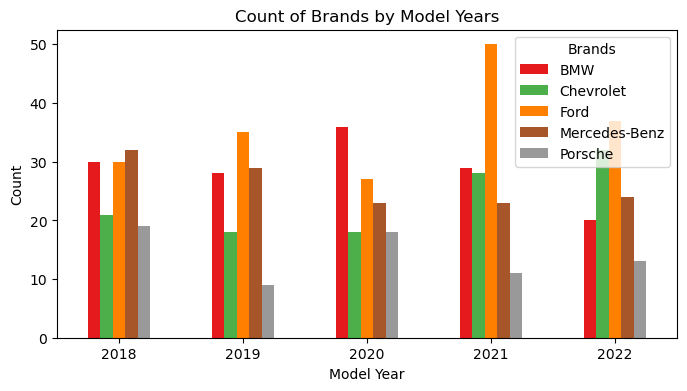

In [163]:
#e)
top_brands = cars['brand'].value_counts().nlargest(5).index.tolist()
top_model_year = cars['model_year'].value_counts().nlargest(5).index.tolist()
filtered_data = cars[cars['brand'].isin(top_brands) & cars['model_year'].isin(top_model_year)]
grouped_data = filtered_data.groupby(['model_year','brand']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 4), colormap='Set1')
plt.title('Count of Brands by Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Brands',loc='upper right')
plt.show()

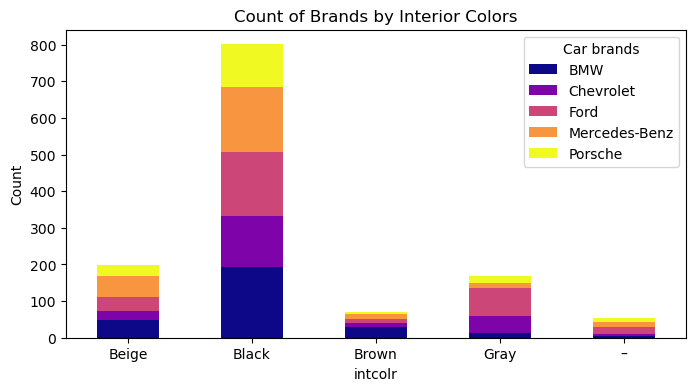

In [164]:
#f)
top_brands = cars['brand'].value_counts().nlargest(5).index.tolist()
top_intcol = cars['int_col'].value_counts().nlargest(5).index.tolist()
filtered_data = cars[cars['brand'].isin(top_brands)& cars['int_col'].isin(top_intcol)]
grouped_data = filtered_data.groupby(['int_col','brand']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='plasma')
plt.title('Count of Brands by Interior Colors')
plt.xlabel('intcolr')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Car brands')
plt.show()